<h2><center>PREDICTION USING SUPERVISED ML(Level-Beginner)</center></h2>
<h4 align = "right">-Shree Varshini,Intern at The Sparks Foundation</h4>

<h4>PROBLEM STATEMENT</h4>
<p>            What will be the Predicted Score if a student studies 9.25hrs/day?</p>

In [11]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [4]:
#Load dataset
df = pd.read_csv("http://bit.ly/w-data")

In [68]:
#Basic Exploration of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
df.info()
#we have 25 rows and 2 columns (numerical values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [54]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


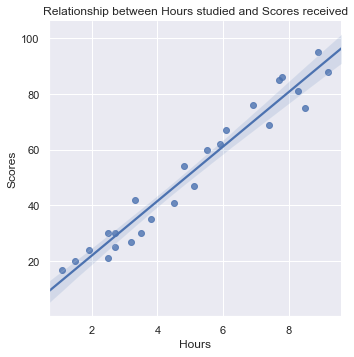

In [53]:
sns.lmplot(x = 'Hours',y = 'Scores',data = df)
plt.title("Relationship between Hours studied and Scores received")
plt.subplots_adjust(top=0.95) 

<h5>From the graph and correlation value, we can see that there is a strong linear relationship between Hours and Scores</h5>

<h3>Preparing the dataset</h3>

In [ ]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:,1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
#Fitting linear regression to Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print("Regression coefficient: ",reg.coef_,"\nRegression intercept: ",reg.intercept_)

Regression coefficient:  [9.91065648] 
Regression intercept:  2.018160041434683


<h3>Comparing the Actual and Predicted values</h3>

In [77]:
y_pred = reg.predict(X_test)
x_test =list(X_test)
df_pred = pd.DataFrame({'X_test':x_test,'y_test':y_test,'y_pred':y_pred})
df_pred

,X_test,y_test,y_pred
0,[1.5],20,16.884145
1,[3.2],27,33.732261
2,[7.4],69,75.357018
3,[2.5],30,26.794801
4,[5.9],62,60.491033


<h5>We can see that the Actual and Predicted values are more or less the same.</h5>

<h3>Predicting the scores with our own data</h3>

In [78]:
arr = [[9.25]]
y_pred_own = reg.predict(arr)
print("The student scores nearly",y_pred_own[0],"when he/she studies 9.25 hrs/day");

The student scores nearly 93.69173248737538 when he/she studies 9.25 hrs/day


<h4>The student scores nearly 93.6917 when he/she studies about 9.25 hrs/day</h4>

<h3>Evaluating the model</h3>

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

<h5>We can see that R^2 score is nearly one and this shows us that our model fits the data well.